In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("topSubscribed.csv")

In [3]:
df

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012
...,...,...,...,...,...,...,...
995,996,XO TEAM,"11,500,000","11,471,384,709","2,679",People & Blogs,2021
996,997,Nirahua Music World,"11,500,000","5,997,717,755",788,Music,2014
997,998,YtCrash,"11,400,000","3,825,084",1,Education,2015
998,999,Painzeiro,"11,400,000","2,143,444,281",946,People & Blogs,2015


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   object
 3   Video Views      1000 non-null   object
 4   Video Count      1000 non-null   object
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [7]:
df.isnull().sum()

Youtube Channel    0
Subscribers        0
Video Views        0
Video Count        0
Category           0
Started            0
dtype: int64

In [5]:
df["Subscribers"]=df["Subscribers"].str.replace(',','')
df["Video Views"]=df["Video Views"].str.replace(',','')
df["Video Count"]=df["Video Count"].str.replace(',','')

In [6]:
df["Subscribers"]=df["Subscribers"].astype("float64")
df["Video Views"]=df["Video Views"].astype("float64")
df["Video Count"]=df["Video Count"].astype("float64")

In [7]:
df.columns=df.columns.str.replace(' ','_')

In [8]:
df["Category"].value_counts()

Entertainment                                                                   238
Music                                                                           217
People & Blogs                                                                  132
Gaming                                                                           94
Comedy                                                                           68
Film & Animation                                                                 50
Education                                                                        45
Howto & Style                                                                    43
https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels     30
News & Politics                                                                  27
Science & Technology                                                             18
Shows                                                                       

In [9]:
df = df[df.Category != 'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels']

df['Category'].value_counts()

Entertainment            238
Music                    217
People & Blogs           132
Gaming                    94
Comedy                    68
Film & Animation          50
Education                 45
Howto & Style             43
News & Politics           27
Science & Technology      18
Shows                     14
Sports                    10
Pets & Animals             6
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           1
Travel & Events            1
Name: Category, dtype: int64

In [10]:
df[["Video_Views","Youtube_Channel"]].sort_values(by = "Video_Views", ascending  = False).head(10)

,Video_Views,Youtube_Channel
0,2.129003e+11,T-Series
2,1.490842e+11,Cocomelon - Nursery Rhymes
3,1.378281e+11,SET India
16,9.111729e+10,Sony SAB
8,8.720294e+10,Like Nastya
7,8.663857e+10,✿ Kids Diana Show
10,7.357770e+10,WWE
11,7.244412e+10,Vlad and Niki
28,5.949393e+10,Movieclips
26,5.782565e+10,Colors TV


In [12]:
# Channel with highest views
df.iloc[df['Video_Views'].argmax()]

Rank                            1
Youtube_Channel          T-Series
Subscribers           234000000.0
Video_Views        212900271553.0
Video_Count               18515.0
Category                    Music
Started                      2006
Name: 0, dtype: object

In [16]:
df["Category"].value_counts()

Entertainment            238
Music                    217
People & Blogs           132
Gaming                    94
Comedy                    68
Film & Animation          50
Education                 45
Howto & Style             43
News & Politics           27
Science & Technology      18
Shows                     14
Sports                    10
Pets & Animals             6
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           1
Travel & Events            1
Name: Category, dtype: int64

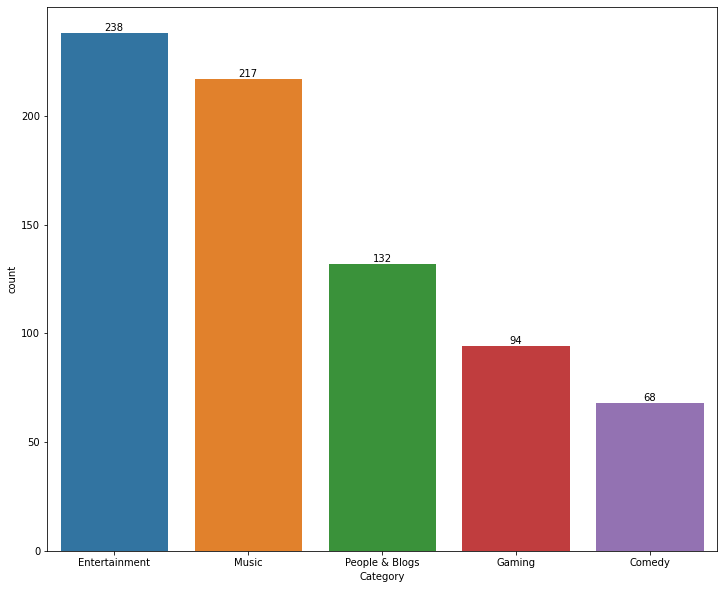

In [13]:
top5 = df["Category"].value_counts().head(5)

plt.figure(figsize=(12,10))

ax = sns.countplot(x=df["Category"],order=top5.index)
ax.bar_label(ax.containers[0])
plt.show()

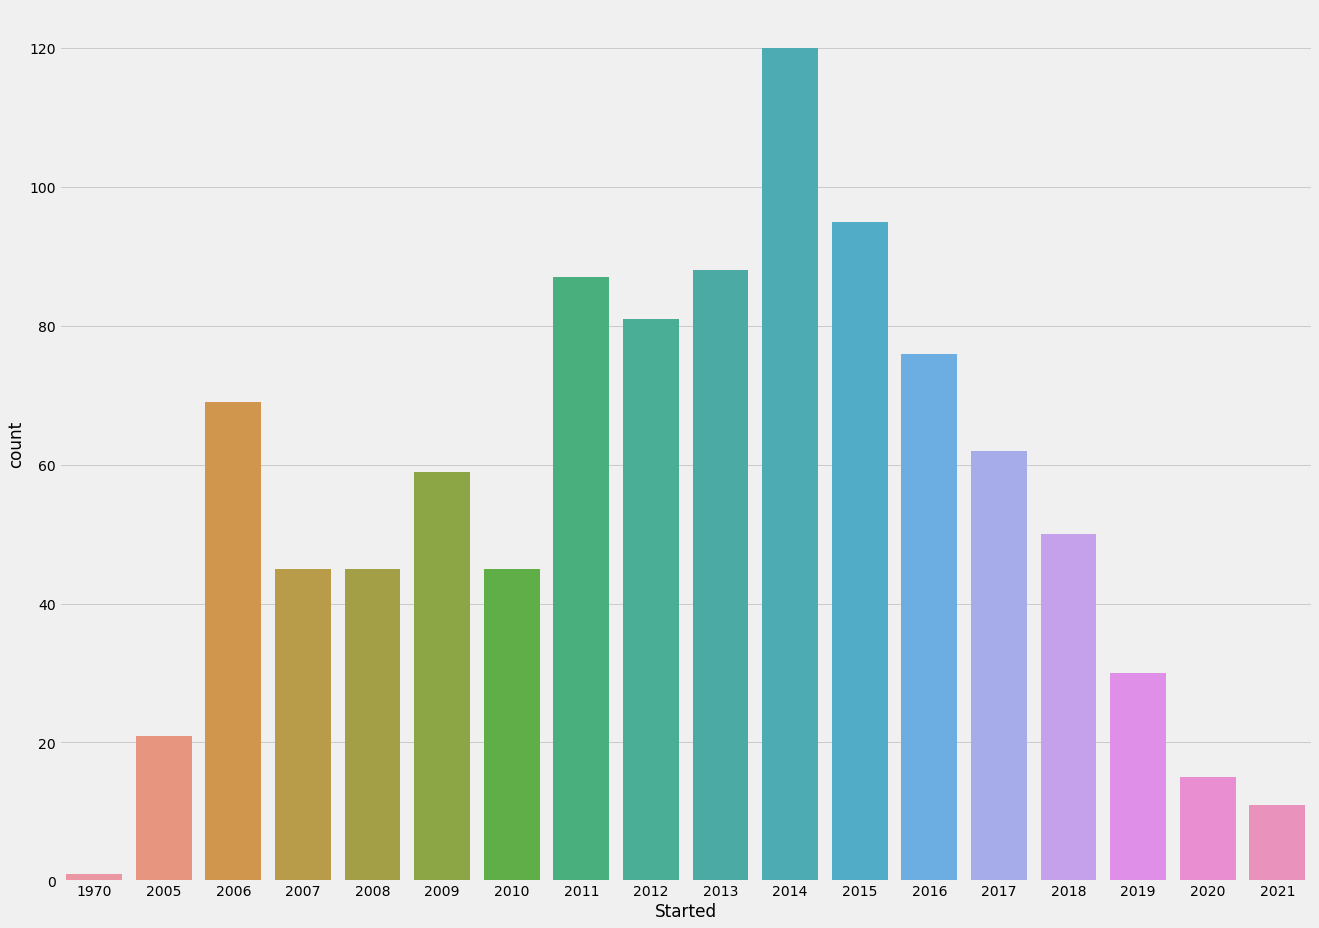

<Figure size 1008x864 with 0 Axes>

In [39]:
sns.countplot(x="Started",data=df)
plt.figure(figsize=(14,12))
plt.show()

In [43]:
df.corr()

,Subscribers,Video_Views,Video_Count,Started,Total_Views
Subscribers,1.000000,0.753648,0.064661,-0.135162,0.753648
Video_Views,0.753648,1.000000,0.151196,-0.157634,1.000000
Video_Count,0.064661,0.151196,1.000000,-0.141080,0.151194
Started,-0.135162,-0.157634,-0.141080,1.000000,-0.157634
Total_Views,0.753648,1.000000,0.151194,-0.157634,1.000000


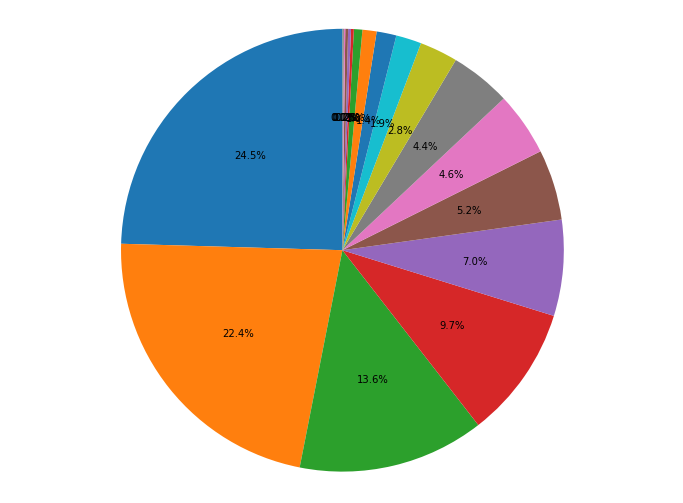

In [15]:
# New dataframe to hold category value count
df_byCat = df['Category'].value_counts().to_frame('Count').rename_axis('Category').reset_index()

df_byCat 
labels = df_byCat['Category']
plt.figure(figsize=(12,9))
plt.pie(df_byCat['Count'], autopct='%1.1f%%',shadow=False, startangle=90)
plt.axis('equal')
plt.show()